In [2]:
import pandas as pd

In [3]:
df = pd.read_csv("titanic.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [5]:
df['Age'] = df['Age'].fillna(df.Age.mean())

In [6]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [7]:
df=df.drop(['Cabin','PassengerId','Ticket','Name'],axis=1)

In [8]:
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.000000,1,0,7.2500,S
1,1,1,female,38.000000,1,0,71.2833,C
2,1,3,female,26.000000,0,0,7.9250,S
3,1,1,female,35.000000,1,0,53.1000,S
4,0,3,male,35.000000,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
886,0,2,male,27.000000,0,0,13.0000,S
887,1,1,female,19.000000,0,0,30.0000,S
888,0,3,female,29.699118,1,2,23.4500,S
889,1,1,male,26.000000,0,0,30.0000,C


### One Hot Encoder on Embarked column

In [9]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
df = pd.get_dummies(df, columns=['Embarked' ])
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S
0,0,3,male,22.000000,1,0,7.2500,False,False,True
1,1,1,female,38.000000,1,0,71.2833,True,False,False
2,1,3,female,26.000000,0,0,7.9250,False,False,True
3,1,1,female,35.000000,1,0,53.1000,False,False,True
4,0,3,male,35.000000,0,0,8.0500,False,False,True
...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.000000,0,0,13.0000,False,False,True
887,1,1,female,19.000000,0,0,30.0000,False,False,True
888,0,3,female,29.699118,1,2,23.4500,False,False,True
889,1,1,male,26.000000,0,0,30.0000,True,False,False


In [10]:
df.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age           0
SibSp         0
Parch         0
Fare          0
Embarked_C    0
Embarked_Q    0
Embarked_S    0
dtype: int64

### Label Encoding of Embarked Columns and SEX


In [11]:
df['Embarked_C'] = label_encoder.fit_transform(df['Embarked_C'])
df['Embarked_Q'] = label_encoder.fit_transform(df['Embarked_Q'])
df['Embarked_S'] = label_encoder.fit_transform(df['Embarked_S'])
df['Sex'] = label_encoder.fit_transform(df['Sex'])

In [12]:
df = pd.get_dummies(df, columns=['Pclass' ])

In [13]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()
df['Age'] = sc.fit_transform(df['Age'].values.reshape(-1, 1))
df

,Survived,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S,Pclass_1,Pclass_2,Pclass_3
0,0,1,0.271174,1,0,7.2500,0,0,1,False,False,True
1,1,0,0.472229,1,0,71.2833,1,0,0,True,False,False
2,1,0,0.321438,0,0,7.9250,0,0,1,False,False,True
3,1,0,0.434531,1,0,53.1000,0,0,1,True,False,False
4,0,1,0.434531,0,0,8.0500,0,0,1,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,1,0.334004,0,0,13.0000,0,0,1,False,True,False
887,1,0,0.233476,0,0,30.0000,0,0,1,True,False,False
888,0,0,0.367921,1,2,23.4500,0,0,1,False,False,True
889,1,1,0.321438,0,0,30.0000,1,0,0,True,False,False


In [14]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
df['Fare'] = sc.fit_transform(df['Fare'].values.reshape(-1, 1))
df

,Survived,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S,Pclass_1,Pclass_2,Pclass_3
0,0,1,0.271174,1,0,-0.502445,0,0,1,False,False,True
1,1,0,0.472229,1,0,0.786845,1,0,0,True,False,False
2,1,0,0.321438,0,0,-0.488854,0,0,1,False,False,True
3,1,0,0.434531,1,0,0.420730,0,0,1,True,False,False
4,0,1,0.434531,0,0,-0.486337,0,0,1,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,1,0.334004,0,0,-0.386671,0,0,1,False,True,False
887,1,0,0.233476,0,0,-0.044381,0,0,1,True,False,False
888,0,0,0.367921,1,2,-0.176263,0,0,1,False,False,True
889,1,1,0.321438,0,0,-0.044381,1,0,0,True,False,False


In [15]:
y = df['Survived']
x = df.drop(columns=['Survived']) 
y

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

In [16]:
x.head()

,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S,Pclass_1,Pclass_2,Pclass_3
0,1,0.271174,1,0,-0.502445,0,0,1,False,False,True
1,0,0.472229,1,0,0.786845,1,0,0,True,False,False
2,0,0.321438,0,0,-0.488854,0,0,1,False,False,True
3,0,0.434531,1,0,0.420730,0,0,1,True,False,False
4,1,0.434531,0,0,-0.486337,0,0,1,False,False,True


In [17]:
from sklearn.model_selection import train_test_split
x_train , x_test , y_train , y_test = train_test_split(x , y , test_size=0.2 ,random_state=42)
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((712, 11), (712,), (179, 11), (179,))

### Logistic Regression Model

In [18]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()

log_reg.fit(x_train, y_train)


LogisticRegression()

In [19]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns


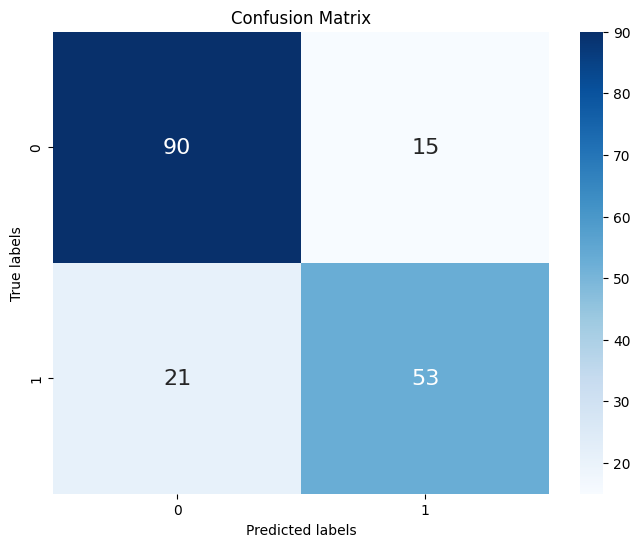

In [21]:
y_pred = log_reg.predict(x_test)
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', annot_kws={"size": 16})
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

In [22]:
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)

print("Precision:", precision)
print("Recall:", recall)
print("Accuracy:", accuracy)

Precision: 0.7794117647058824
Recall: 0.7162162162162162
Accuracy: 0.7988826815642458
